<a href="https://colab.research.google.com/github/shatakshi-1404/News-Article-Classifier-/blob/main/News_Article_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training samples: 1774
Test samples: 1180

Sample article:
From: jk87377@lehtori.cc.tut.fi (Kouhia Juhana)
Subject: Re: More gray levels out of the screen
Organization: Tampere University of Technology
Lines: 21
Distribution: inet
NNTP-Posting-Host: cc.tut.fi ...
Classification Report:
                    precision    recall  f1-score   support

     comp.graphics       0.96      0.96      0.96       389
rec.sport.baseball       0.97      0.99      0.98       397
         sci.space       0.98      0.95      0.97       394

          accuracy                           0.97      1180
         macro avg       0.97      0.97      0.97      1180
      weighted avg       0.97      0.97      0.97      1180



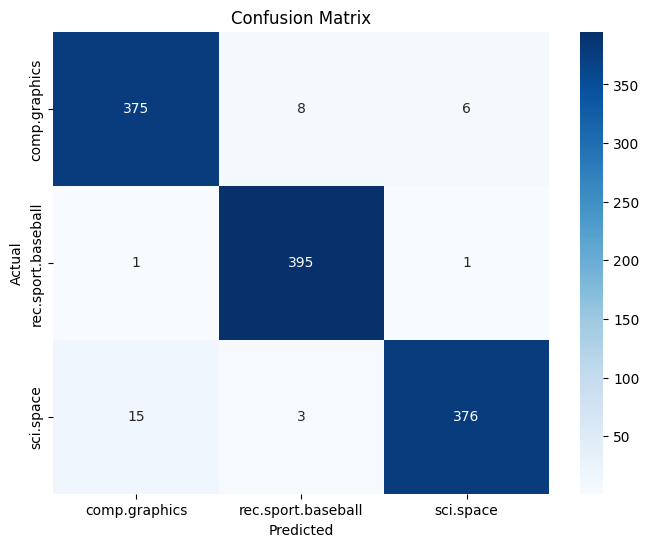


Model Predictions:

'The NASA spacecraft reached Mars orbit yesterday...' → sci.space

'The new graphics card delivers 30% better performa...' → comp.graphics

'The Yankees won their game 5-3 last night...' → rec.sport.baseball


In [3]:
# %% [markdown]
# # 📰 News Article Classifier - Self-Contained ML Project
# **Perfect for your resume - runs with no setup!**

# %% [markdown]
# ## 1. Import Libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# %% [markdown]
# ## 2. Load Built-in Dataset
categories = ['sci.space', 'comp.graphics', 'rec.sport.baseball']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

print(f"Training samples: {len(newsgroups_train.data)}")
print(f"Test samples: {len(newsgroups_test.data)}")
print("\nSample article:")
print(newsgroups_train.data[0][:200], "...")

# %% [markdown]
# ## 3. Create and Train Model
model = make_pipeline(
    TfidfVectorizer(),
    LinearSVC()
)

model.fit(newsgroups_train.data, newsgroups_train.target)

# %% [markdown]
# ## 4. Evaluate Performance
predictions = model.predict(newsgroups_test.data)

print("Classification Report:")
print(classification_report(newsgroups_test.target, predictions,
                           target_names=newsgroups_test.target_names))

# Confusion Matrix Visualization
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(newsgroups_test.target, predictions),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=newsgroups_test.target_names,
            yticklabels=newsgroups_test.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# %% [markdown]
# ## 5. Try It Yourself!
def classify_article(text):
    pred = model.predict([text])[0]
    return newsgroups_train.target_names[pred]

# Test examples
examples = [
    "The NASA spacecraft reached Mars orbit yesterday",
    "The new graphics card delivers 30% better performance",
    "The Yankees won their game 5-3 last night"
]

print("\nModel Predictions:")
for example in examples:
    print(f"\n'{example[:50]}...' → {classify_article(example)}")